In [60]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [80]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def random_crop(spec):
    rows, cols = spec.shape
    desired_shape = rows
    diff = cols - desired_shape
    beginning_col = np.random.randint(0, diff + 1)
    spec = spec[:, beginning_col:beginning_col + desired_shape]
    spec = scale_minmax(spec, 0, 255).astype(np.uint8)
    return spec

In [137]:
file = 'E:\\Projects\\SER\\datasets\\RAMAS\\testing\\cut_and_labeled\\segmented\\train\\000_10dec_D63_2_1827_Domination.wav'
y, sr = librosa.load(file, sr=None)

In [138]:
print(sr)

44100


In [159]:
spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=224)
spec = librosa.power_to_db(spec)
spec = random_crop(spec)

(224, 224)


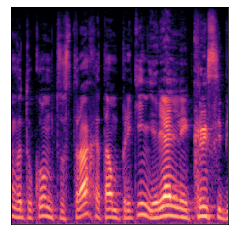

In [160]:
librosa.display.specshow(spec)
print(spec.shape)
plt.imshow(spec)

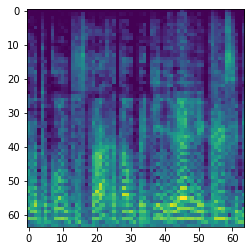

In [143]:
img = scale_minmax(spec, 0, 255).astype(np.uint8)  # min-max scale to fit inside 8-bit range
img = np.flip(img, axis=0)  # put low frequencies at the bottom in image
img = cv2.resize(img, dsize=(64,64), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)